In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [2]:
# 设置超参数 
input_size = 784   #28*28
num_classes = 10   #0~9
num_epochs = 50
batch_size = 100
learning_rate = 0.001


In [3]:
 # 下载手写体数据集 MNIST 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=False,
                                           
                                           )
 
test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor(),
                                          )
 

In [4]:
# 设置数据加载器
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
 

In [5]:
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
# 判定GPU是否存在
device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [7]:
# Logistic 回归模型
model = nn.Linear(input_size, num_classes).to(device)
 

In [8]:
# 定义损失函数Loss 和优化器 optimizer
criterion = nn.CrossEntropyLoss()   #交叉熵
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [9]:
from itertools import product

parameters = dict(
    learning_rate = [0.01,0.001],
    batch_size= [100,1000]
)

print(parameters)


{'learning_rate': [0.01, 0.001], 'batch_size': [100, 1000]}


In [10]:
param_values = [v for v in parameters.values()]
print(param_values)

[[0.01, 0.001], [100, 1000]]


In [11]:
for learning_rate,batch_size in product(*param_values):
    print(learning_rate,batch_size)

0.01 100
0.01 1000
0.001 100
0.001 1000


In [12]:
# 训练模型
train_loss = []
    
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 前向传递
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 后向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            train_loss.append(loss.data.cpu())


Epoch [1/50], Step [100/600], Loss: 2.2108
Epoch [1/50], Step [200/600], Loss: 2.1059
Epoch [1/50], Step [300/600], Loss: 2.0120
Epoch [1/50], Step [400/600], Loss: 1.9673
Epoch [1/50], Step [500/600], Loss: 1.8602
Epoch [1/50], Step [600/600], Loss: 1.7841
Epoch [2/50], Step [100/600], Loss: 1.7824
Epoch [2/50], Step [200/600], Loss: 1.6769
Epoch [2/50], Step [300/600], Loss: 1.6864
Epoch [2/50], Step [400/600], Loss: 1.5616
Epoch [2/50], Step [500/600], Loss: 1.4856
Epoch [2/50], Step [600/600], Loss: 1.3835
Epoch [3/50], Step [100/600], Loss: 1.4589
Epoch [3/50], Step [200/600], Loss: 1.3986
Epoch [3/50], Step [300/600], Loss: 1.3356
Epoch [3/50], Step [400/600], Loss: 1.3060
Epoch [3/50], Step [500/600], Loss: 1.2220
Epoch [3/50], Step [600/600], Loss: 1.2091
Epoch [4/50], Step [100/600], Loss: 1.2329
Epoch [4/50], Step [200/600], Loss: 1.1917
Epoch [4/50], Step [300/600], Loss: 1.1335
Epoch [4/50], Step [400/600], Loss: 1.1219
Epoch [4/50], Step [500/600], Loss: 1.0504
Epoch [4/50

Epoch [32/50], Step [300/600], Loss: 0.4868
Epoch [32/50], Step [400/600], Loss: 0.5784
Epoch [32/50], Step [500/600], Loss: 0.5380
Epoch [32/50], Step [600/600], Loss: 0.5178
Epoch [33/50], Step [100/600], Loss: 0.4260
Epoch [33/50], Step [200/600], Loss: 0.4646
Epoch [33/50], Step [300/600], Loss: 0.3985
Epoch [33/50], Step [400/600], Loss: 0.4931
Epoch [33/50], Step [500/600], Loss: 0.5646
Epoch [33/50], Step [600/600], Loss: 0.5431
Epoch [34/50], Step [100/600], Loss: 0.4137
Epoch [34/50], Step [200/600], Loss: 0.4744
Epoch [34/50], Step [300/600], Loss: 0.5260
Epoch [34/50], Step [400/600], Loss: 0.4325
Epoch [34/50], Step [500/600], Loss: 0.4976
Epoch [34/50], Step [600/600], Loss: 0.5415
Epoch [35/50], Step [100/600], Loss: 0.5118
Epoch [35/50], Step [200/600], Loss: 0.4884
Epoch [35/50], Step [300/600], Loss: 0.5219
Epoch [35/50], Step [400/600], Loss: 0.5376
Epoch [35/50], Step [500/600], Loss: 0.4282
Epoch [35/50], Step [600/600], Loss: 0.5676
Epoch [36/50], Step [100/600], L

In [15]:
with torch.no_grad():
    correct = 0
    total = 0
    temp = 0
    for i,(images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 89.35 %


In [14]:
torch.save(model.state_dict(),'testLog_model.pth')

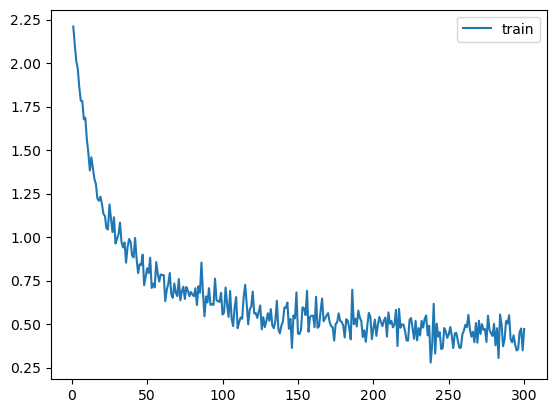

In [13]:
# 绘制loss曲线
import matplotlib.pyplot as plt


plt.plot([i for i in range(1, len(train_loss)+1)], train_loss, label="train")
plt.legend()
plt.show()

In [16]:
import os
from PIL import Image
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# this function is for read image,the input is directory name
def read_directory(directory_name):
    # this loop is for read each image in this foder,directory_name is the foder name with images.
    file=open('E:/MyProject/digits/data.txt','w') 
    for filename in os.listdir(directory_name):
        #img is used to store the image data 
        img = Image.open(directory_name + "/" + filename)
        img = img.convert('L')  # 灰度化
        img_array = np.array(img)
        X_temp = np.array((255-img_array), dtype=float)
    
        print(filename)
        file.write(str(X_temp)); 
    file.close()

read_directory("E:/MyProject/digits/img")

# 打开文件
f = open('E:/MyProject/digits/data.txt','r')
fs = f.readlines()
s = fs
f.close()

# 正则过滤非数字
for i in range(len(s)):
        s[i] = re.sub(r'\D', " ", s[i])
           
# 将 s 按空格拆分存到 spl 中   
sp = []
spl = [] 
for i in range(len(s)):
    sp = s[i].split()
    for j in range(len(sp)):
         spl.append(sp[j])
                   
arr= []
arr2 = []

# 按每784个一组，将spl中的数据存到arr2中
for l in range(int(len(spl)/784)):
    for i in range(784*l,784*(l+1)):
        arr.append(spl[i])
    
    arr2.append(arr)
    arr = []
    
# 将 arr2 转换为数组存入arr3
arr3=np.asarray(arr2)

0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


In [17]:
def processing(img_input):
    arr3_mat = np.mat(img_input)
    arr3_mat = arr3_mat.astype(float)
    arr4 = torch.from_numpy(arr3_mat)
    img = arr4/255
    img = img.type(torch.FloatTensor)
    img_output = img.to(device)
    return img_output

In [18]:
def predict(arr3):
    y_predict = []
    for i in range(arr3.shape[0]):
        
        img = processing(arr3[i])
        
        with torch.no_grad():
            out1 = model(img)  
            predicted, index  = torch.max(out1, 1)
            degree = int(index[0])            
            y_predict.append(degree)
            
    return y_predict
        

In [59]:
#读取模型
path = 'E:/MachineLearning/手写字符识别项目/testLog_model.pth'
check = torch.load(path)
model.load_state_dict(check)


<All keys matched successfully>

In [19]:
y_predict = predict(arr3)
y_predict

[0, 8, 2, 6, 4, 3, 5, 0, 8, 8]